In [1]:
import seaborn as sns
print(sns.__version__)

0.11.0


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data/NMC_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data/NMC_data/j_rul.npy
./data/NMC_data/o_fea.npy
./data/NMC_data/d_fea.npy
./data/NMC_data/NMC_Battery_RUL_train_fea.npy
./data/NMC_data/NMC_Battery_RUL_train_rul.npy
./data/NMC_data/n_rul.npy
./data/NMC_data/b_rul.npy
./data/NMC_data/NMC_Battery_RUL_test_fea.npy
./data/NMC_data/d_rul.npy
./data/NMC_data/l_fea.npy
./data/NMC_data/t_rul.npy
./data/NMC_data/a_rul.npy
./data/NMC_data/s_rul.npy
./data/NMC_data/n_fea.npy
./data/NMC_data/b_fea.npy
./data/NMC_data/f_rul.npy
./data/NMC_data/NMC_Battery_RUL_test_rul.npy
./data/NMC_data/a_fea.npy
./data/NMC_data/g_fea.npy
./data/NMC_data/p_fea.npy
./data/NMC_data/e_fea.npy
./data/NMC_data/e_rul.npy
./data/NMC_data/g_rul.npy
./data/NMC_data/s_fea.npy
./data/NMC_data/p_rul.npy
./data/NMC_data/f_fea.npy
./data/NMC_data/c_rul.npy
./data/NMC_data/o_rul.npy
./data/NMC_data/l_rul.npy
./data/NMC_data/NMC_Battery_RUL.csv
./data/NMC_data/j_fea.npy
./data/NMC_data/t_fea.npy
./data/NMC_data/c_fea.npy


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/home/lbh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/lbh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fi

In [4]:
data = pd.read_csv('./data/NMC_data/NMC_Battery_RUL.csv')

In [5]:
data.shape

(15064, 9)

In [6]:
data.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

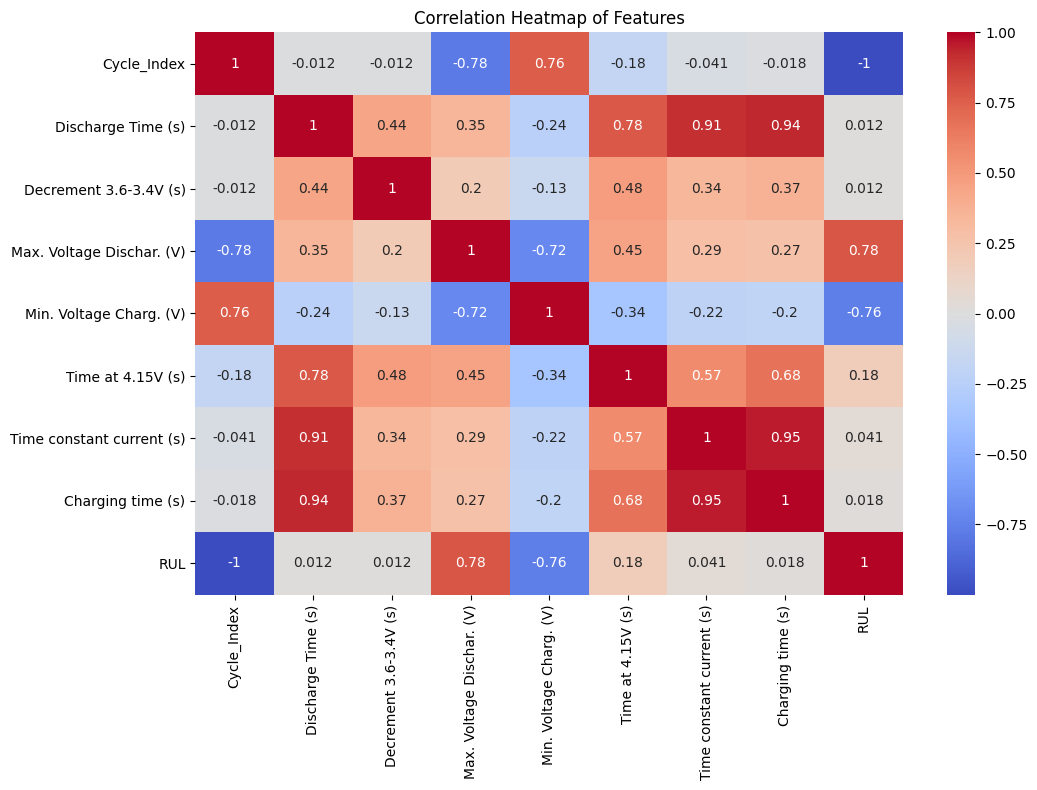

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
# Assuming you have a DataFrame 'df' containing your data
features = ['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
            'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
            'Time at 4.15V (s)', 'Time constant current (s)',
            'Charging time (s)', 'RUL']

# Select the subset of columns you want to include in the heatmap
selected_features = data[features]

# Calculate the correlation matrix
corr_matrix = selected_features.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(11, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.savefig('./figure/Correlation Heatmap of Features.png',bbox_inches='tight', dpi=100)
plt.show()


In [9]:
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [9]:
data.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [10]:
# Split features (X) and target (y)
X = data.drop(columns=['RUL'])
y = data['RUL']

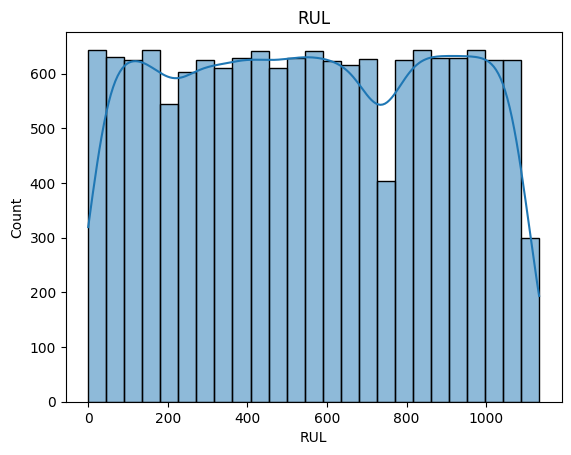

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("RUL")
sns.histplot(data.RUL, kde=True)
plt.savefig('./figure/RUL.png')
plt.show()

In [13]:
data['RUL'].min()
data['RUL'].max()

1133

In [14]:
import pandas as pd

# Assuming you have a DataFrame 'df' containing your data
# Replace 'df' with your actual DataFrame name

rul_counts = data['RUL'].value_counts()

print(rul_counts)


0       14
1058    14
43      14
35      14
27      14
        ..
738      1
1121     1
737      1
1128     1
1131     1
Name: RUL, Length: 1133, dtype: int64


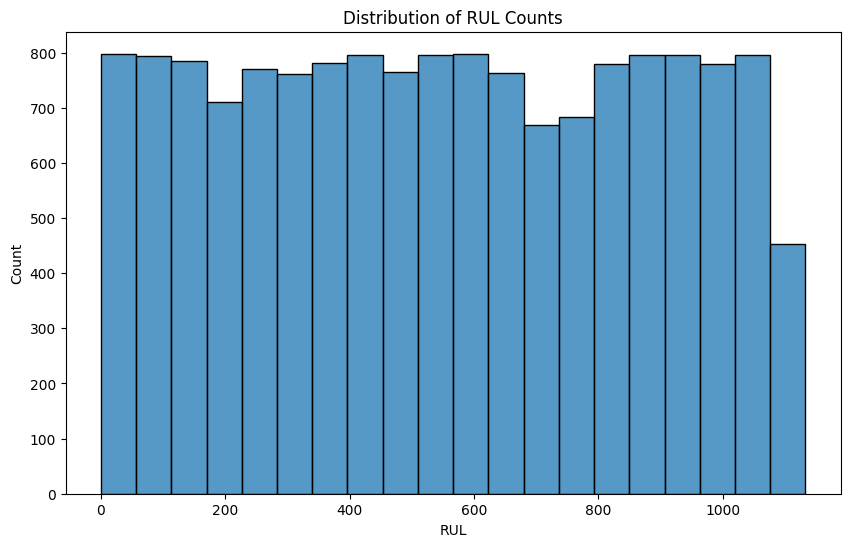

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='RUL', bins=20)  # Adjust the number of bins as needed
plt.title('Distribution of RUL Counts')
plt.xlabel('RUL')
plt.ylabel('Count')
plt.savefig('./figure/Distribution of RUL Counts.png')
plt.show()


<Figure size 1200x800 with 0 Axes>

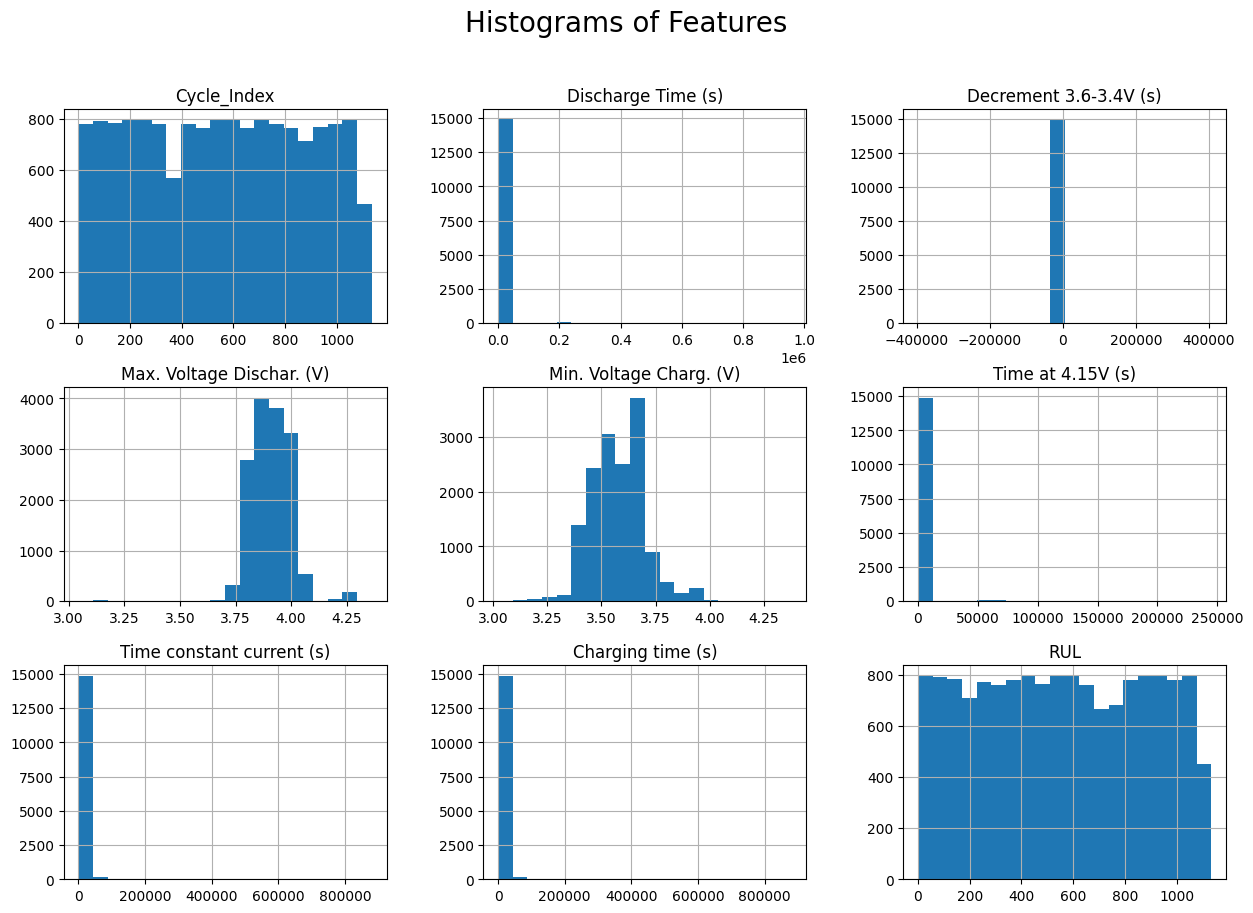

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
            'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
            'Time at 4.15V (s)', 'Time constant current (s)',
            'Charging time (s)', 'RUL']

# Histogram for each feature
plt.figure(figsize=(12, 8))
data[features].hist(bins=20, layout=(3, 3), figsize=(15, 10))
plt.suptitle('Histograms of Features',fontsize=20)
plt.savefig('./figure/Histograms of Features.png',bbox_inches='tight', dpi=100)
plt.show()


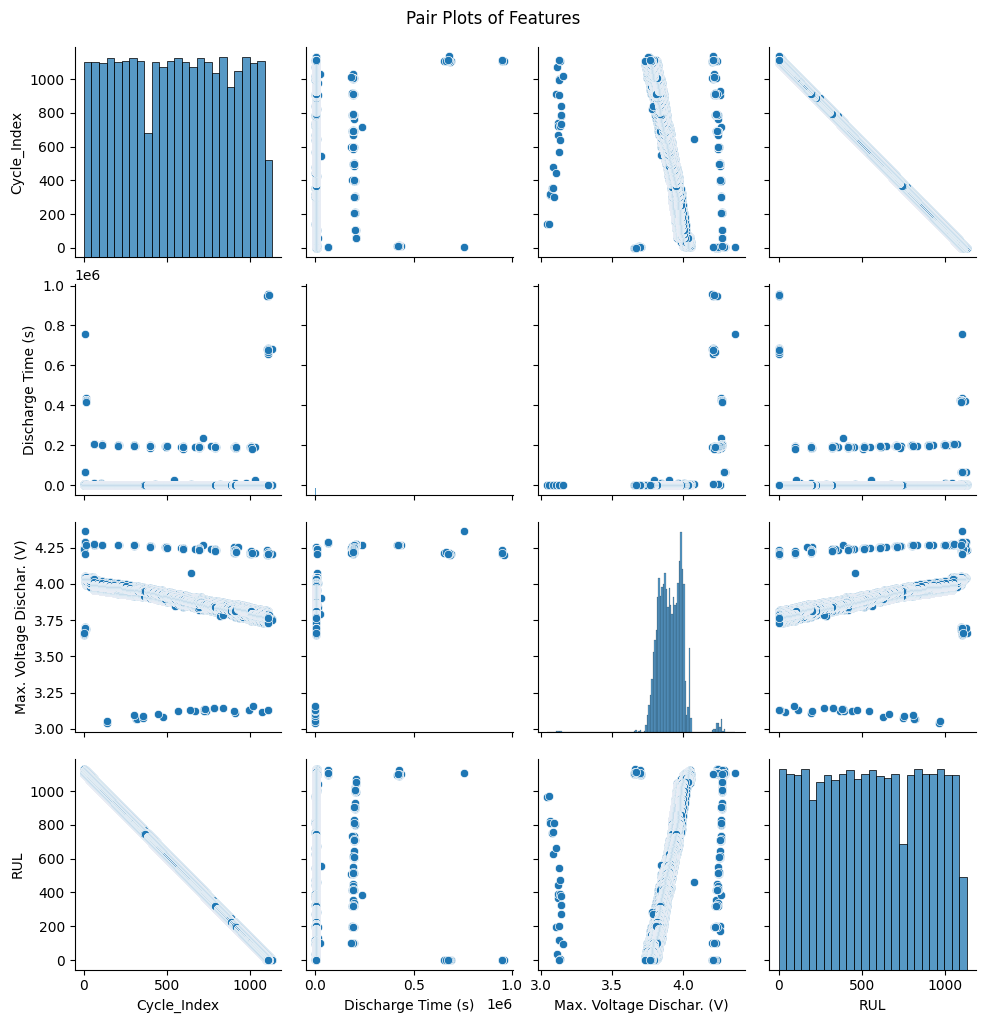

In [39]:
selected_features = ['Cycle_Index', 'Discharge Time (s)', 'Max. Voltage Dischar. (V)', 'RUL']
# Create a pair plot using the selected featuresnum_colors = len(data[selected_features].columns)
# num_colors = len(data[selected_features].columns)
# rdpu_colors = plt.cm.RdPu(np.linspace(0, 1, num_colors))

sns.pairplot(data=data[selected_features])
plt.suptitle('Pair Plots of Features',y=1.02)
plt.savefig('./figure/Pair Plots of Features.png')
plt.show()


In [25]:
X.shape

(15064, 8)

In [26]:
import numpy as np
y=np.array(y)
y.shape

(15064,)

In [27]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_scaled = scaler.fit_transform(X)


In [28]:
X_scaled

array([[-1.72211691e+00, -5.99215290e-02, -5.87111131e-03, ...,
         1.85301633e-01,  5.14308290e-02,  2.69293156e-02],
       [-1.71901486e+00,  8.53083170e-02, -4.47315439e-03, ...,
         1.90668010e-01,  5.17095012e-02,  1.64248488e-02],
       [-1.71591282e+00,  8.48593522e-02, -8.43087389e-03, ...,
         1.90668120e-01,  5.17095012e-02,  1.33973423e-02],
       ...,
       [ 1.71805320e+00, -1.15021697e-01, -7.05114155e-02, ...,
        -3.12492630e-01, -1.60960259e-01, -1.29829417e-01],
       [ 1.72115524e+00, -1.14878076e-01, -7.16406378e-02, ...,
        -3.53694046e-01, -1.71467510e-01, -9.10817266e-02],
       [ 1.72425729e+00,  2.03046732e+01,  9.40887079e+00, ...,
         5.02907365e+00,  2.36282501e+01,  2.23272880e+01]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape


(12051, 8)

In [31]:
X_test.shape


(3013, 8)

In [32]:
y_train.shape


(12051,)

In [33]:
y_test.shape

(3013,)

In [ ]:
#########################

In [34]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
len(X_train_scaled)

12051

In [36]:
len(y_train)

12051

In [37]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_scaled = model.predict(X_test_scaled)

In [38]:

# Calculate Mean Squared Error (MSE) as a basic evaluation metric
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f"Mean Squared Error with scaling: {mse_scaled}")

Mean Squared Error with scaling: 54.54307066385837


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Example: Using Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error with Random Forest: {mse_rf}")


/home/lbh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/lbh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/home/lbh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. D

Mean Squared Error with Random Forest: 14.420582011284434


/home/lbh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [ ]:
#######3lstm

In [40]:
# Load the dataset

import numpy as np
import pandas as pd
data = pd.read_csv("/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv")
from sklearn.preprocessing import MinMaxScaler

# Drop unnecessary columns
#data = data.drop(columns=["timestamp"])

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)



FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv'

In [ ]:
# Prepare features and labels
sequence_length = 50  # Adjust this according to your needs
X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i : i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)



In [42]:
# Prepare features and labels
sequence_length = 50  # Adjust this according to your needs
X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i : i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)



NameError: name 'data_scaled' is not defined

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [24]:
X_train.shape

(12011, 50, 9)

In [25]:
y_train.shape

(12011, 9)

In [26]:
X_test.shape

(3003, 50, 9)

In [27]:
y_test.shape

(3003, 9)

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, LeakyReLU
from keras.optimizers import SGD

model = Sequential()

model.add(LSTM(units=128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=data_scaled.shape[1]))  # Output layer with the same number of features

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
376/376 [==============================] - 65s 158ms/step - loss: 0.0035
Epoch 2/10
376/376 [==============================] - 63s 168ms/step - loss: 0.0013
Epoch 3/10
376/376 [==============================] - 59s 156ms/step - loss: 0.0011
Epoch 4/10
376/376 [==============================] - 56s 150ms/step - loss: 0.0011
Epoch 5/10
376/376 [==============================] - 56s 148ms/step - loss: 0.0011
Epoch 6/10
376/376 [==============================] - 56s 149ms/step - loss: 0.0010
Epoch 7/10
376/376 [==============================] - 56s 150ms/step - loss: 0.0010
Epoch 8/10
376/376 [==============================] - 57s 153ms/step - loss: 0.0010
Epoch 9/10
376/376 [==============================] - 57s 151ms/step - loss: 9.8887e-04
Epoch 10/10
376/376 [==============================] - 56s 148ms/step - loss: 9.8211e-04


In [34]:

predicted_values = model.predict(X_test)



94/94 [==============================] - 6s 57ms/step


In [29]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f"Train loss: {train_loss:.4f}")
print(f"Test loss: {test_loss:.4f}")

Train loss: 0.0009
Test loss: 0.0012


NameError: name 'predicted_values' is not defined

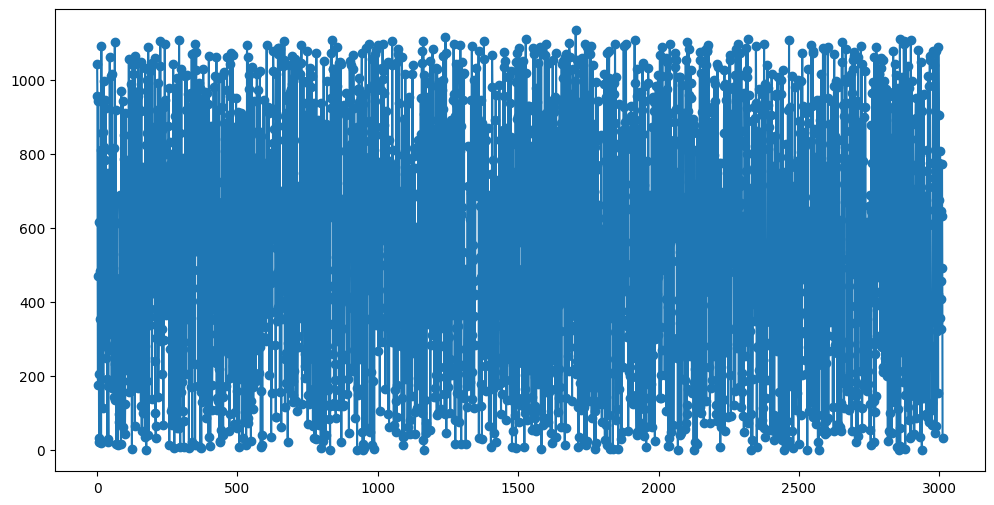

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', marker='x')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
